# 📊🖼️ CIFAR-10 Image Classification Project:

This `Colab` notebook implements an end-to-end deep learning model to classify images from the CIFAR-10 dataset using TensorFlow/Keras.

## 📖 Introduction

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes/labels:

    0. Airplanes
    1. Cars
    2. Birds
    3. Cats
    4. Deer
    5. Dogs
    6. Frogs
    7. Horses
    8. Ships
    9. Trucks

- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32).
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


## ⚙️ Setup Libraries and Dataset Import:



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from  keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

ModuleNotFoundError: No module named 'keras'

In [ ]:
X_train.shape    # (no. of images, width of image, height of image, channels (3 channels are RGB))

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


## 📊 Data Visualization:

[2]


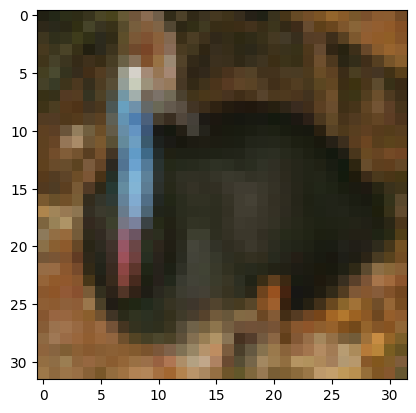

In [5]:
# Shows the image at i position:
i = 2004
plt.imshow(X_train[i])
print(y_train[i])

In [6]:
# We create a grid of 15 x 15:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()   # Ravel is used to flatten the 15 x 15 grid into 225 arrays

n_training = len(X_train)

# We shall put random images in each position of this grid:

for i in np.arange(0, L_grid * W_grid):    # from 0 to 225
  index = np.random.randint(0, n_training)   # pick a random number from 0 to 50000
  axes[i].imshow(X_train[index])
  # Also adding labels to each image:
  axes[i].set_title(y_train[index])
  # To remove the axis around each image:
  axes[i].axis('off')

# To add some spacing between all the images:
plt.subplots_adjust(hspace = 0.4)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
n_training

50000

## 📥 Data Preperation:

In [8]:
# Converting the images into float data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
# Number of labels/classes:
number_cat = 10

In [10]:
# Converting the decimal values of y_train to binary values:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [11]:
# Also converting y_test values:
y_test = keras.utils.to_categorical(y_test, number_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [12]:
# Normalize the X_train and X_test:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [14]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

## 🏗️ Model Architecture:

Build a Convolutional Neural Network (CNN) with:

- Convolutional layers

- MaxPooling layers

- Dropout for regularization

- Dense output layer with softmax activation

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [16]:
# Build the model:

# Adding 2 convolution layers:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation= "relu", input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation= "relu"))
# Adding the Max pooling layer:
cnn_model.add(MaxPooling2D(2,2))    # Pool size =  2,2
# Adding the dropout layer:
cnn_model.add(Dropout(0.4))    # To drop 40% neurons along with their weights

# Adding 2 more convolution layers for more depth:
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation= "relu"))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation= "relu"))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

# Adding the Flattening layer:
cnn_model.add(Flatten())

# Adding a fully connected neural network:
cnn_model.add(Dense(units = 1024, activation= "relu"))   # Hidden layer
cnn_model.add(Dense(units = 1024, activation= "relu"))

# Adding the output layer:
cnn_model.add(Dense(units = 10, activation= "softmax"))    # since there can be classification of 10 classes and softmax so that we get our values 0 or 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 🚀 Model Training:

- Compile the model with appropriate optimizer which in our case is the Root Mean Square `rmsprop` and loss function.

- The Learning rate is kept `0.001` , batch size is `64` and it is being trained for `20` epochs.

In [17]:
# Compiling the Model:
import tensorflow as tf
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
# Training pipeline (also the training parameters):
history = cnn_model.fit(X_train, y_train, batch_size = 64, epochs = 20, shuffle = True)  # shuffling the order of images for training

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.2783 - loss: 1.9694
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5365 - loss: 1.2993
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6414 - loss: 1.0181
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7038 - loss: 0.8577
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7412 - loss: 0.7454
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7660 - loss: 0.6761
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7893 - loss: 0.6115
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8073 - loss: 0.5675
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8193 - loss: 0.5263
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8289 - loss: 0.5043
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8398 - loss: 0.4799
Epoch 12/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/st

## 📈 Model Inference:

We got an `accuracy of 0.78` which is not bad as desirable was to get `0.8` so we are close.


In [19]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7889 - loss: 0.7335
Test Accuracy: 0.7835000157356262


In [20]:
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)
predicted_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [21]:
# Now we need to convert the y values back from binary to decimal:
# Reload the dataset to get the original y_test:
from  keras.datasets import cifar10
(_, _), (_, y_test_original) = cifar10.load_data()

# Use the original y_test for comparison:
y_test = y_test_original.flatten() # Flatten the array to match the shape of predicted_classes
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

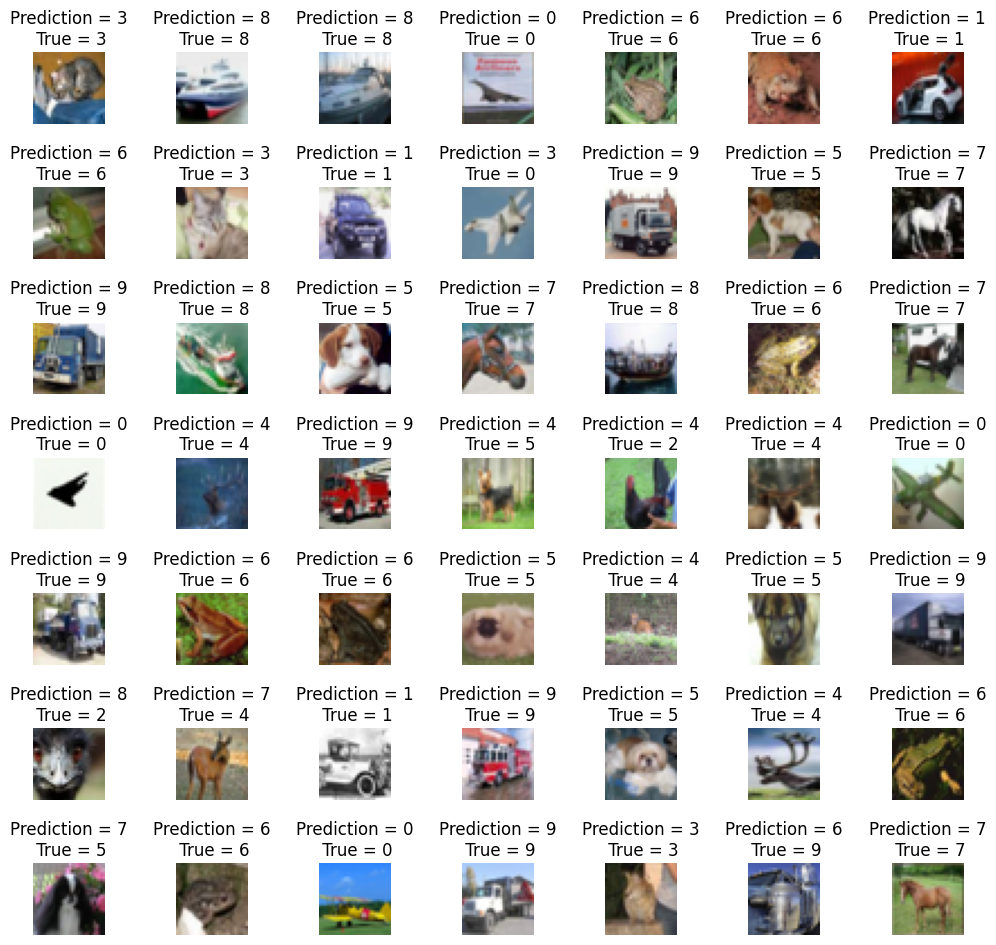

In [22]:
# Created a grid for inferencing and visualizing the results:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [23]:
# Making the confusion matrix: (summarize all results in one place):
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
cm    # This 10 x 10 matrix summarizes how many classes are correctly classified and how many misclassified

array([[818,  13,  31,  25,  17,   5,  11,   3,  62,  15],
       [ 11, 917,   0,   5,   6,   4,   7,   0,  27,  23],
       [ 65,   2, 671,  63,  55,  43,  72,  10,  18,   1],
       [ 22,   7,  52, 608,  46, 143,  91,  13,  15,   3],
       [ 16,   6,  50,  52, 774,  20,  47,  24,   9,   2],
       [ 10,   3,  41, 153,  38, 694,  31,  26,   4,   0],
       [  6,   2,  29,  30,  24,  14, 883,   3,   7,   2],
       [ 23,   1,  18,  48,  62,  49,  16, 779,   1,   3],
       [ 38,   9,  13,  15,   2,   7,   4,   0, 906,   6],
       [ 31,  94,   4,  14,   5,   4,  10,  10,  43, 785]])

Whenever the big values with 'e' come in the middle or away to the right, it means that the model has predicted that sample correctly. Whereas if these values come left, this means misclassification has occured for that sample:

<Axes: >

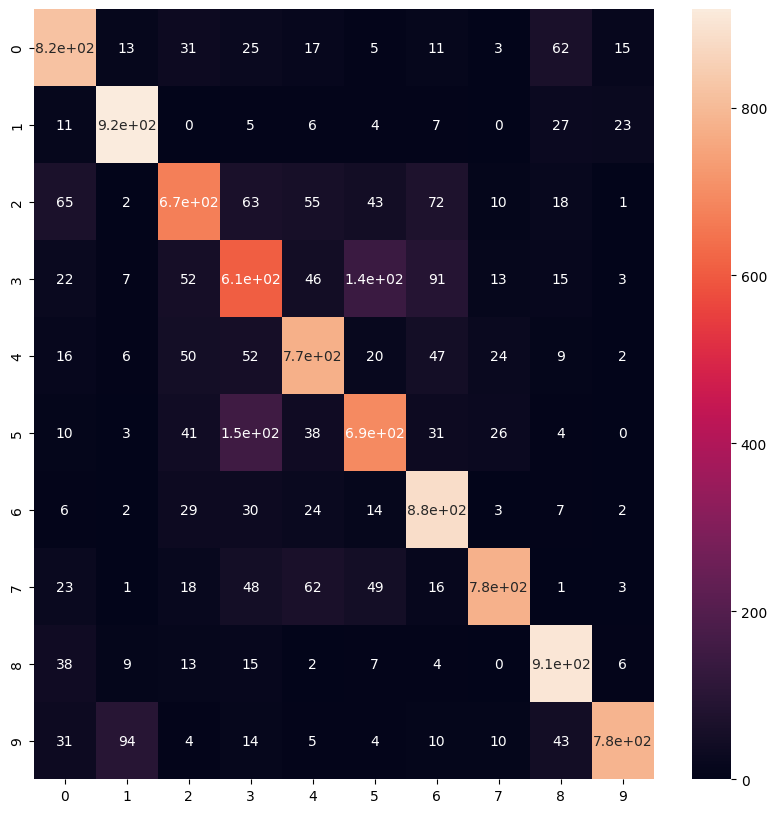

In [24]:
# Visualizing this using seaborn:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

## ⬇️ Saving Model:

  Saving the model diretly into the google drive:

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# Save the model to your Google Drive
cnn_model.save('/content/drive/My Drive/Colab Notebooks/cifar10_cnn_model.h5')

# Data Augmentation for CIFAR-10 Dataset:

- Improving the accuracy of the model using data augmentation.

- We are basically creating different versions of the images to train the model on more extensive data.

Note: This section is more of an example to how data augmentation is done. Skip this while  implementing the notebook.

In [1]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
# We take any 8  pictures as sample training set:
n = 15
X_train_sample = X_train[:n]
X_train_sample.shape

(15, 32, 32, 3)

In [17]:
# Now we generate more data using ImageDataGenerator:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 90)    # To rotate the images from 0 to 90 degree randomly
dataget_train.fit(X_train_sample)

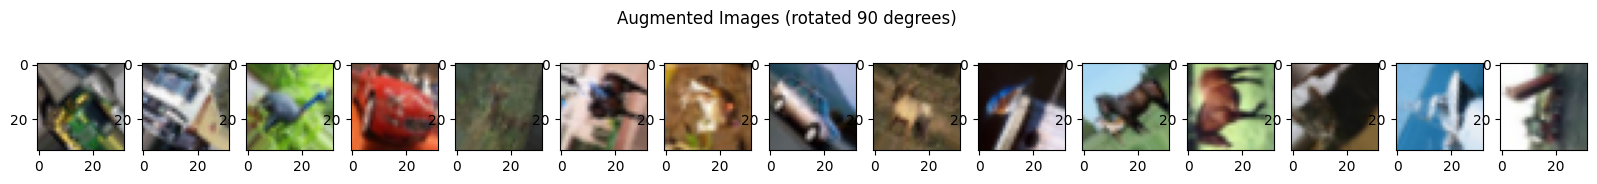

In [18]:
# To actually perform the rotation or any augmentation:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
  for i in range(0, n):
    ax = fig.add_subplot(1, n, i+1)
    ax.imshow(x_batch[i].astype('uint8')) # Convert to uint8 for displaying
  fig.suptitle('Augmented Images (rotated 90 degrees)')
  plt.show()
  break;

# Model Training and Inferencing using Augmentated Dataset:

- Note: Do everything and skip the data augmentation part.

Before training, just augmenting the images more:

## 🧩 Data Augmentation: 

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                              rotation_range = 90,
                              width_shift_range = 0.1,
                              horizontal_flip = True,
                              vertical_flip = True
                            )

In [29]:
datagen.fit(X_train)

## 🚀 Model Training (With Augmentated Dataset):

In [31]:
# To generate and fit the new data and train the model on it:
cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 64), epochs = 20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.4020 - loss: 1.7082
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4787 - loss: 1.4753
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5050 - loss: 1.4058
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.5225 - loss: 1.3650
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5340 - loss: 1.3292
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5479 - loss: 1.2985
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.5565 - loss: 1.2796
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5609 - loss: 1.2588
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5733 - loss: 1.2495
Epoch 10/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5680 - loss: 1.2429
Epoch 11/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5778 - loss: 1.2223
Epoch 12/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 

## 📈 Model Inference (Augmentated Dataset Model):

In [33]:
# Inferencing the new model:
import keras
score = cnn_model.evaluate(X_test, keras.utils.to_categorical(y_test, number_cat))
print('Test Accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6495 - loss: 1.0593
Test Accuracy 0.650600016117096


In [34]:
predicted_classes_new = np.argmax(cnn_model.predict(X_test), axis=-1)
predicted_classes_new

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([6, 8, 8, ..., 5, 1, 7])

In [35]:
# Now we need to convert the y values back from binary to decimal:
# Reload the dataset to get the original y_test:
from  keras.datasets import cifar10
(_, _), (_, y_test_original) = cifar10.load_data()

# Use the original y_test for comparison:
y_test = y_test_original.flatten() # Flatten the array to match the shape of predicted_classes
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

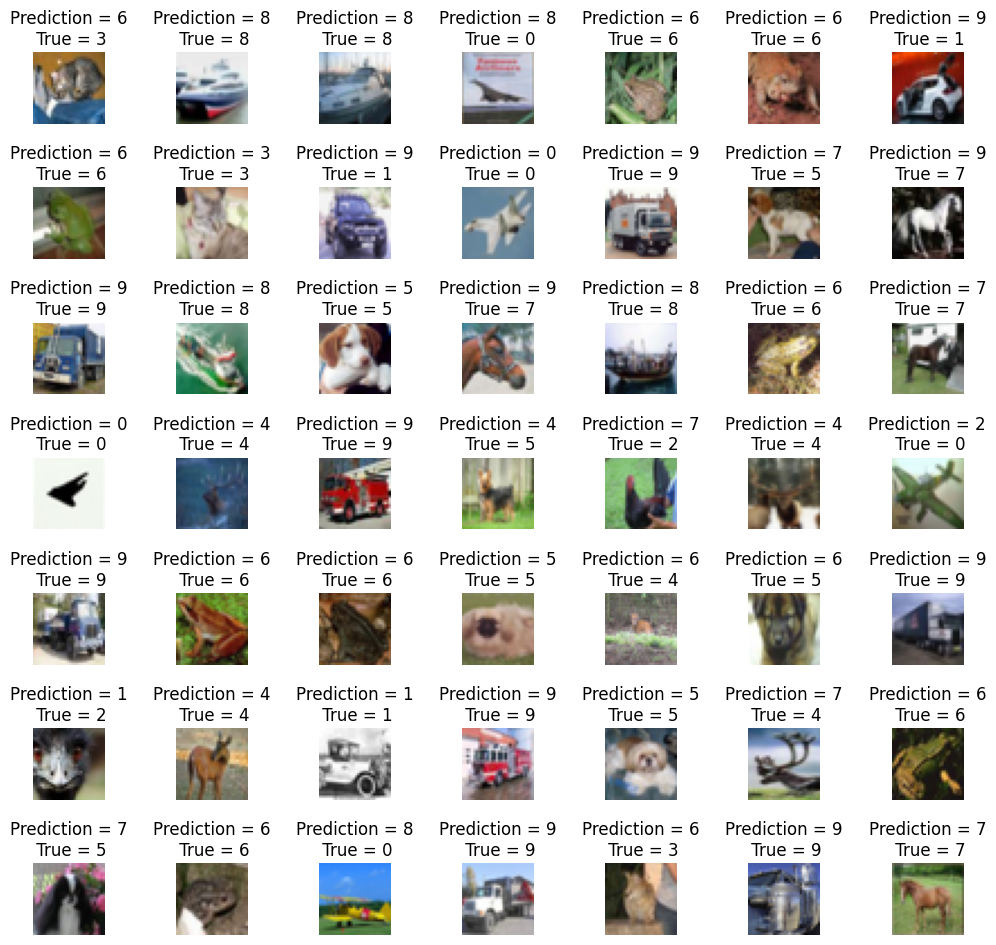

In [36]:
# Created a new grid for inferencing and visualizing the results for augmented dataset model:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes_new[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [39]:
# Making the new confusion matrix: (summarize all results in one place):
from sklearn.metrics import confusion_matrix

cm_new = confusion_matrix(y_test, predicted_classes_new)
cm_new    # This 10 x 10 matrix summarizes how many classes are correctly classified and how many misclassified

array([[584,  45,  64,   4,  15,   1,  14,  34, 164,  75],
       [  0, 815,   0,   1,   0,   3,  17,   7,  21, 136],
       [ 55,  25, 485,  15,  85,  47, 167,  59,  34,  28],
       [ 17,  28,  46, 169,  55, 147, 338,  97,  40,  63],
       [ 16,   1,  83,   7, 524,  14, 272,  55,  15,  13],
       [ 10,  28,  32,  26,  32, 552, 145, 101,  28,  46],
       [  3,   4,  18,   9,  12,  10, 918,  11,   5,  10],
       [ 12,  14,  16,   9,  65,  30,  67, 702,  19,  66],
       [ 23,  26,  13,   0,   1,   3,  10,   7, 877,  40],
       [ 12,  36,   3,   5,   5,   1,  26,   4,  28, 880]])

<Axes: >

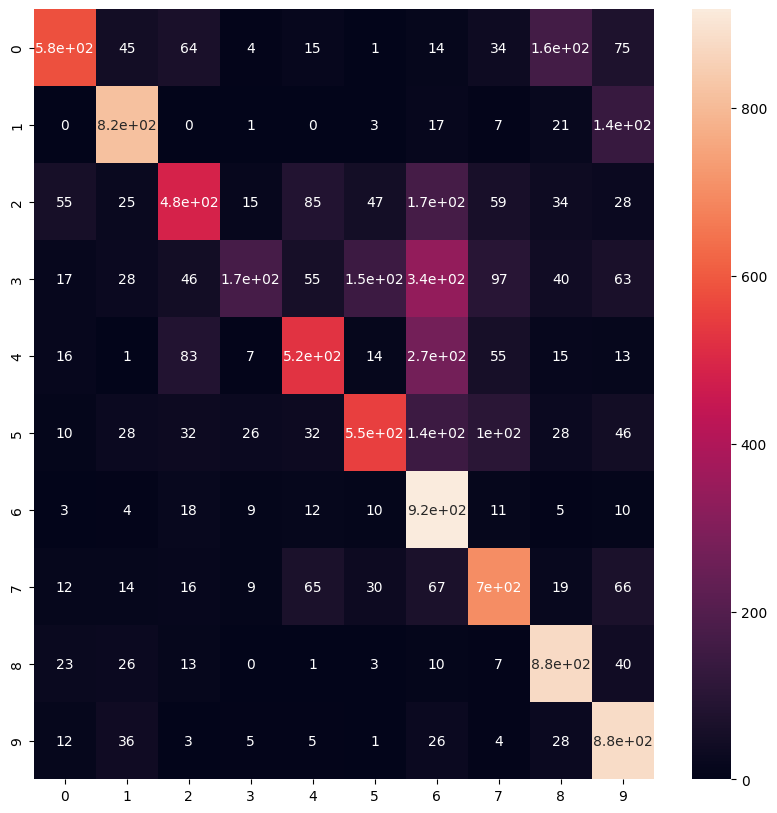

In [40]:
# Visualizing this using seaborn:
plt.figure(figsize = (10,10))
sns.heatmap(cm_new, annot = True)

## ⬇️ Saving the New Model

In [37]:
# Save the new model:
cnn_model.save('/content/drive/My Drive/Colab Notebooks/cifar10_augmented_cnn_model.h5')